At this point there are multiple agents. But they act indepdently. There is no distribution/exchange mechanism for the agents.

Also, the product sector chosen by the agents is randomly selected after they choose to make the production decision. So division of labor will not be correct.

Include each product sector as a unique action. Should also include sector productivity input for agent's Deep Q Network

When agents can possess multiple instruments, will need to generalize or revisit the above.

In [23]:
import time


import Agents
import Instruments
import Simulate
import Environment
import QNN
import SimPlotting

import numpy as np
from scipy.stats import norm, uniform
import random

import matplotlib.pyplot as plt

def initialize_agents(initial_parameters, qnn, Nagents) -> list:
   
    Agent_list = [Agents.Agent(QNN=qnn, **initial_parameters) for i in range(Nagents)]

    return Agent_list

def initialize_instruments(Ninstruments, means, stds):
    '''
    Assumes Normal. Initializes Universal Instruments.
    
    Make more general to incude different distributions'''

    instruments = []

    for N in range(Ninstruments):
        prod_vec = [norm.rvs(loc=mean, scale=std) for mean, std in zip(means, stds)]
        instrument = Instruments.Universal(prod_vec)
        instruments.append(instrument)
        
    return instruments

def initialize_allocation(agent_list, instrument_list):
    
    for agent in agent_list:
        
        random_instrument = random.choice(instrument_list)
        instrument_list.remove(random_instrument)
        
        agent.Ins = random_instrument
        

def time_simulation(Ntimes, Nagents):
    
    dt = 1

    cg = np.array([1.0, 1.0])

    Nproducts = cg.shape[0]

    Nactions = 3 + Nproducts # One production decision for each product + null + exchange + consume

    mean_productivities = [5, 5]
    std_productivities = [0, 0]

    Ninstruments = Nagents

    initial_parameters = {
        'Q': np.random.random(Nproducts)*10,
        'D': np.zeros(Nproducts),
        'cg': cg,
         'M': 10.,
        'n_actions': Nactions
    }

    learning_parameters = {
        'gamma': 0.9,
        #'gamma': 0.5,
        #'gamma': 0.1,
        'epsilon': 1.0,
        'eps_end': 0.001,
        'eps_dec': 0.01,
        'batch_size': 100,
        'input_dims': [3*Nproducts+1],
        #'lr':0.001,
        'lr': 0.005,
        'n_agents': Nagents,
        'n_actions':Nactions,
    }

    qnn = QNN.DeepQNetwork(**learning_parameters)

    agent_list = initialize_agents(initial_parameters, qnn, Nagents)
    instrument_list = initialize_instruments(Ninstruments, mean_productivities, std_productivities)
    market_list = [0]

    initialize_allocation(agent_list, instrument_list)

    env = Environment.Environment(dt, agent_list, instrument_list, market_list)
    sim = Simulate.Simulate(env, qnn)


    start = time.perf_counter()
    sim.run_simulation(Ntimes)
    end = time.perf_counter()

    elapsed_time = end-start

    return elapsed_time


Initialize Parameters

In [24]:
length_array = [1, 10, 50, 100]
#length_array = np.logspace(0, 2.5, 12, dtype=int)
length_array = np.logspace(0,3, 12, dtype=int)
agent_array = [1, 10, 100, 1000]
length_array = np.logspace(0, 3, 10, 12, dtype=int)


In [25]:
length_array = np.unique(np.logspace(0,np.log10(500), 51, dtype=int))
#agent_array = np.unique(np.logspace(0,np.log10(500), 51, dtype=int))
agent_array = [1, 10, 100]

In [26]:
length_array

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  13,  15,
        17,  19,  22,  25,  28,  32,  36,  41,  47,  53,  60,  68,  77,
        87,  99, 112, 127, 144, 163, 184, 209, 237, 268, 304, 344, 389,
       441, 499])

In [27]:
agent_array

[1, 10, 100]

In [28]:
perf_array = np.zeros(shape=(len(length_array), len(agent_array)))

In [29]:
for ti,t in enumerate(length_array):
    
    for ni,n in enumerate(agent_array):
        
        print(t, n)
        
        elapsed_time = time_simulation(t,n)
        
        perf_array[ti,ni] = elapsed_time
        print(elapsed_time)
        print()


1 1
0.0006221999999524996

1 10
0.001954700000055709

1 100
0.04239780000000337

2 1
0.000609600000075261

2 10
0.00439049999999952

2 100
0.04623930000002474

3 1
0.0007759000000078231

3 10
0.004000199999950382

3 100
0.08188109999991866

4 1
0.000996900000018286

4 10
0.005012700000065706

4 100
0.09411039999997683

5 1
0.0008786000000782224

5 10
0.007387199999925542

5 100
0.1328652999999349

6 1
0.0011868999999933294

6 10
0.007840399999963665

6 100
0.15363939999997456

7 1
0.0013700999999173291

7 10
0.013558400000079018

7 100
0.21895299999994222

8 1
0.0018672999999580497

8 10
0.012485200000014629

8 100
0.28173470000001544

9 1
0.001582900000016707

9 10
0.021315799999911178

9 100
0.3280524000000469

10 1
0.0027943000000050233

10 10
0.02874650000001111

10 100
0.3326454000000467

12 1
0.002196500000081869

12 10
0.06316350000008697

12 100
0.38657720000003337

13 1
0.002210900000022775

13 10
0.06187760000000253

13 100
0.35707079999997404

15 1
0.0022663999999394946

15 

In [30]:
perf_array

array([[6.22200000e-04, 1.95470000e-03, 4.23978000e-02],
       [6.09600000e-04, 4.39050000e-03, 4.62393000e-02],
       [7.75900000e-04, 4.00020000e-03, 8.18811000e-02],
       [9.96900000e-04, 5.01270000e-03, 9.41104000e-02],
       [8.78600000e-04, 7.38720000e-03, 1.32865300e-01],
       [1.18690000e-03, 7.84040000e-03, 1.53639400e-01],
       [1.37010000e-03, 1.35584000e-02, 2.18953000e-01],
       [1.86730000e-03, 1.24852000e-02, 2.81734700e-01],
       [1.58290000e-03, 2.13158000e-02, 3.28052400e-01],
       [2.79430000e-03, 2.87465000e-02, 3.32645400e-01],
       [2.19650000e-03, 6.31635000e-02, 3.86577200e-01],
       [2.21090000e-03, 6.18776000e-02, 3.57070800e-01],
       [2.26640000e-03, 7.74588000e-02, 4.05310000e-01],
       [3.25840000e-03, 9.52900000e-02, 5.58517500e-01],
       [3.48630000e-03, 1.42969300e-01, 5.57913400e-01],
       [3.32010000e-03, 1.95136700e-01, 7.09523100e-01],
       [4.53880000e-03, 2.36013300e-01, 7.45093300e-01],
       [4.78530000e-03, 2.42137

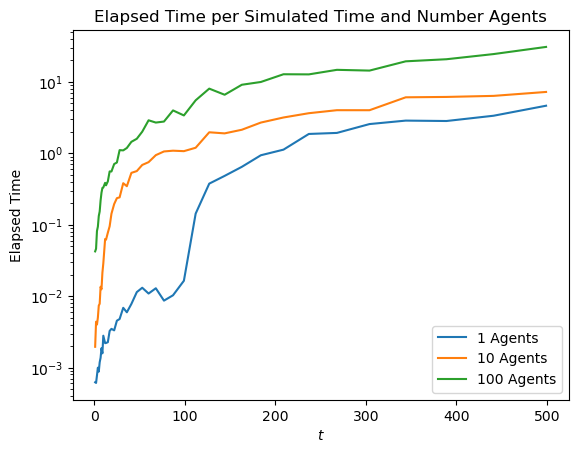

In [31]:
[plt.plot(length_array, perf_array[:,n], label=f'{agent_array[n]} Agents') for n in range(len(agent_array))]
plt.xlabel('$t$')
plt.ylabel('Elapsed Time')
plt.legend()
plt.title('Elapsed Time per Simulated Time and Number Agents')
plt.yscale('log')
#plt.xscale('log')

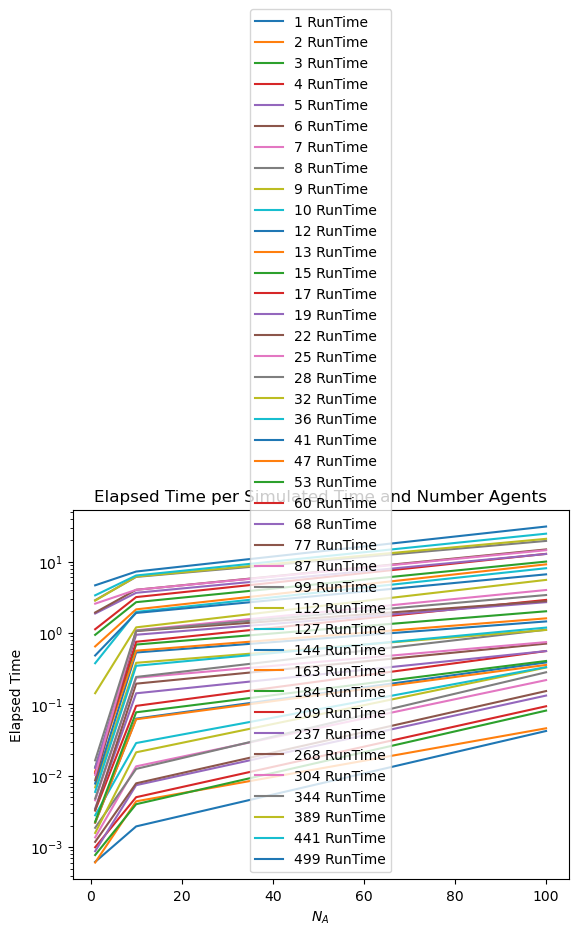

In [32]:
[plt.plot(agent_array, perf_array[t], label=f'{length_array[t]} RunTime') for t in range(len(length_array))]
plt.xlabel('$N_A$')
plt.ylabel('Elapsed Time')
plt.legend()
plt.title('Elapsed Time per Simulated Time and Number Agents')
plt.yscale('log')

In [33]:
import seaborn as sns
import pandas as pd

t = length_array
N = agent_array

df = pd.DataFrame(perf_array, index=t, columns=N)

df

1         10         100
1    0.000622  0.001955   0.042398
2    0.000610  0.004390   0.046239
3    0.000776  0.004000   0.081881
4    0.000997  0.005013   0.094110
5    0.000879  0.007387   0.132865
6    0.001187  0.007840   0.153639
7    0.001370  0.013558   0.218953
8    0.001867  0.012485   0.281735
9    0.001583  0.021316   0.328052
10   0.002794  0.028747   0.332645
12   0.002197  0.063164   0.386577
13   0.002211  0.061878   0.357071
15   0.002266  0.077459   0.405310
17   0.003258  0.095290   0.558517
19   0.003486  0.142969   0.557913
22   0.003320  0.195137   0.709523
25   0.004539  0.236013   0.745093
28   0.004785  0.242138   1.110678
32   0.006871  0.382266   1.102128
36   0.005949  0.347117   1.190245
41   0.007780  0.533354   1.451845
47   0.011409  0.565468   1.602858
53   0.013126  0.688806   2.014012
60   0.010890  0.753771   2.907121
68   0.012909  0.944855   2.702633
77   0.008663  1.064461   2.791967
87   0.010297  1.090836   3.998843
99   0.016445  1.074718   3.400482
112  0.143355  1.199486   5.540044
127  0.376990  1.975034   8.073762
144  0.484101  1.906905   6.626473
163  0.648302  2.143435   9.146997
184  0.941360  2.702238  10.004020
209  1.128470  3.182819  12.835554
237  1.871700  3.654381  12.780956
268  1.935333  4.027173  14.802197
304  2.574442  4.023455  14.444506
344  2.878315  6.101967  19.476388
389  2.841197  6.176646  20.834307
441  3.368140  6.389213  24.603277
499  4.652041  7.254419  30.988344

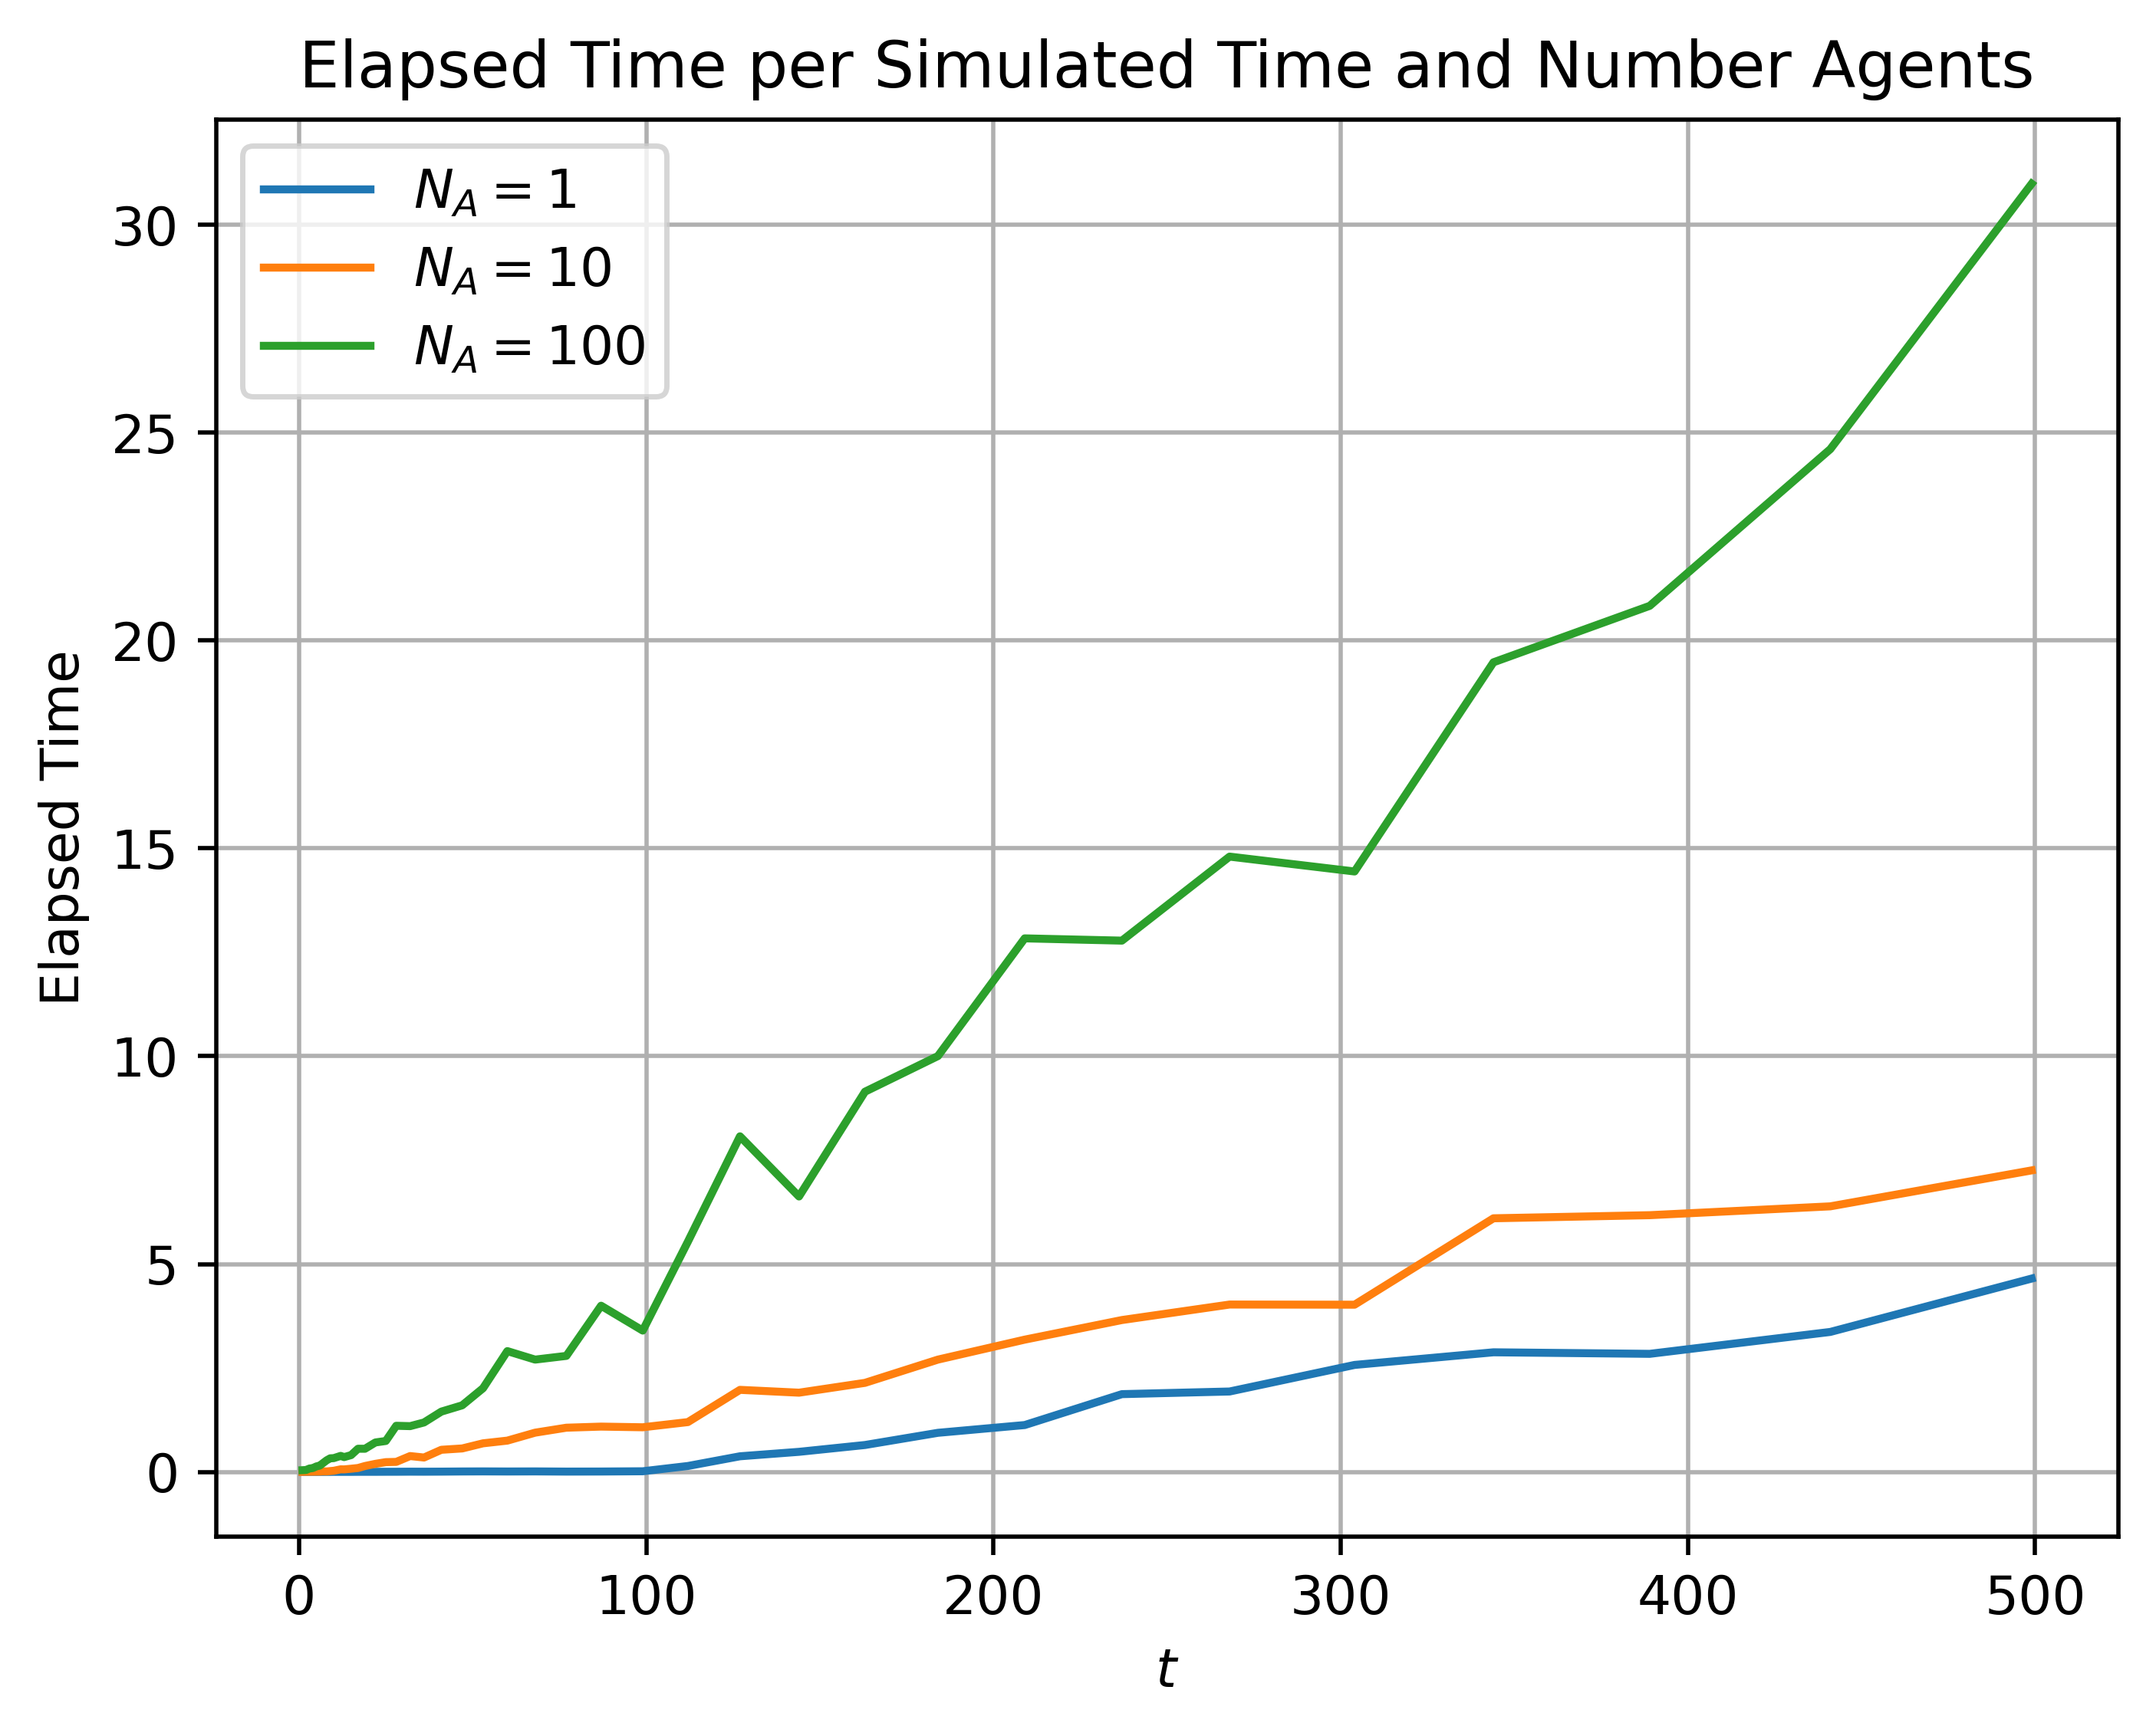

In [34]:
plt.rcParams['figure.dpi'] = 500
[sns.lineplot(data=df, x=df.index, y=n, label=rf'$N_A={n}$') for n in agent_array]
plt.xlabel('$t$')
plt.ylabel('Elapsed Time')
plt.legend()
plt.title('Elapsed Time per Simulated Time and Number Agents')

#plt.yscale('log')

plt.grid(which='major')
plt.grid(which='minor', lw=0.3)

(0.0001, 10000.0)

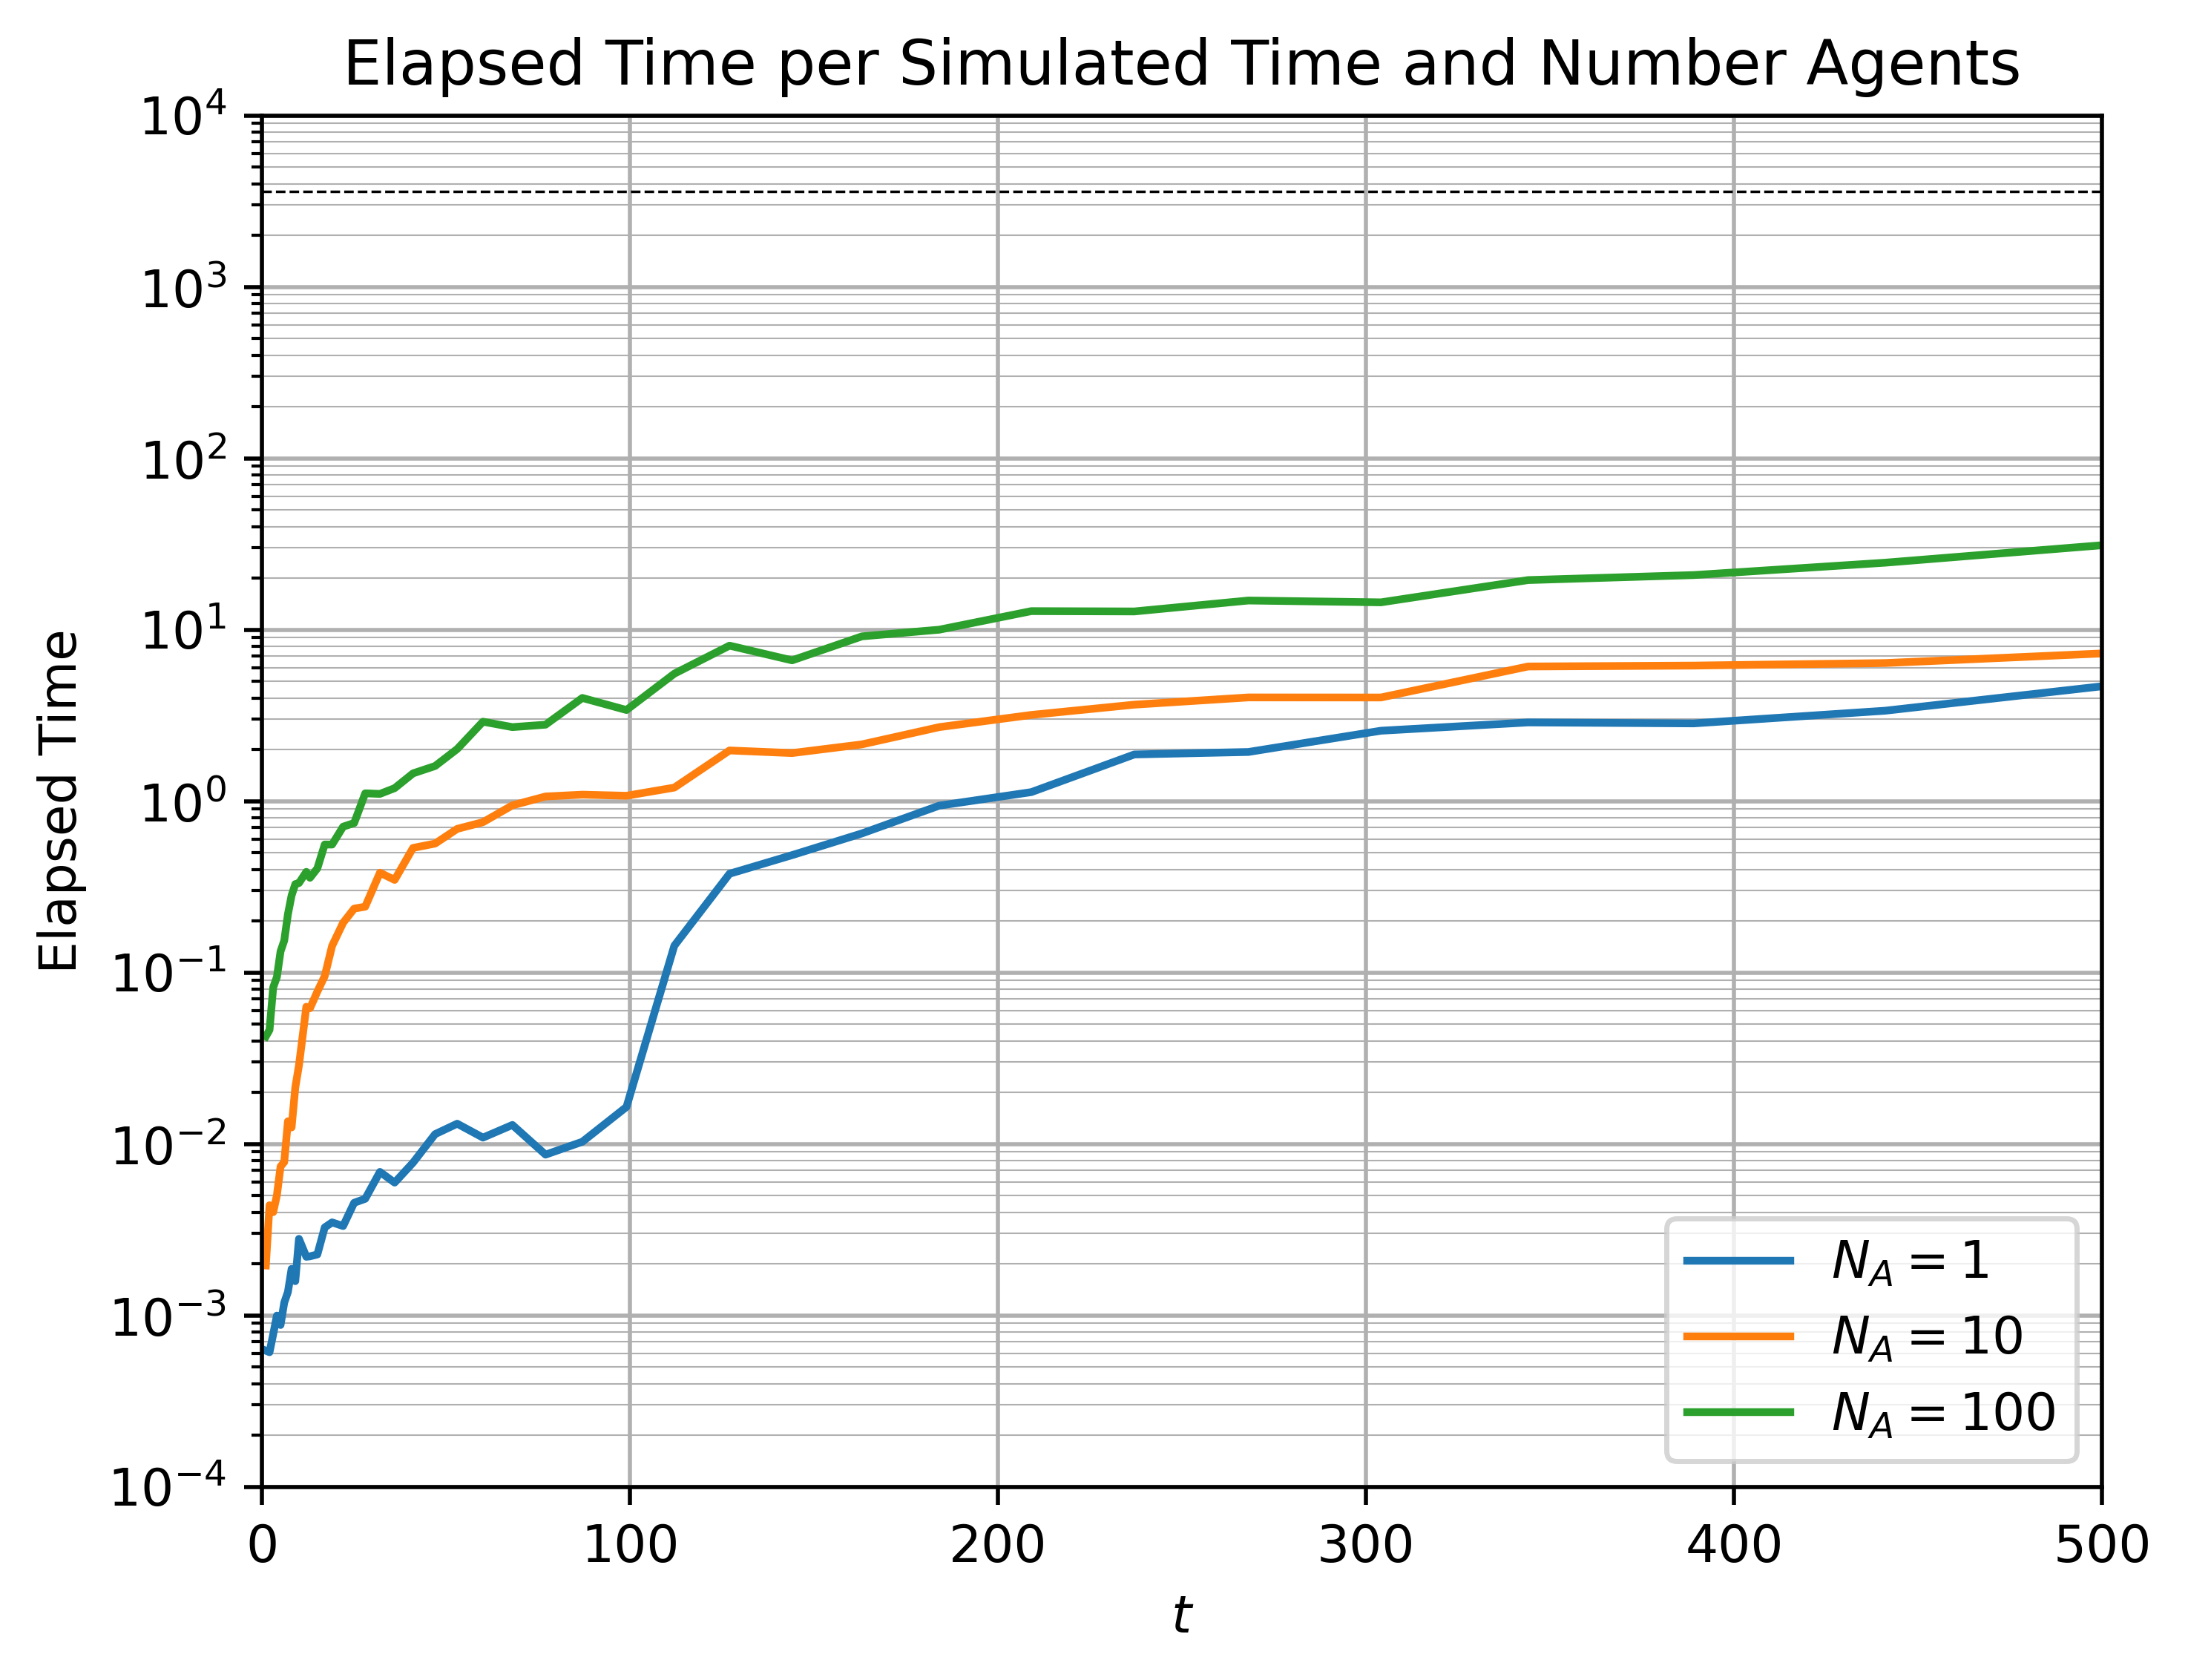

In [45]:
plt.rcParams['figure.dpi'] = 500
[sns.lineplot(data=df, x=df.index, y=n, label=rf'$N_A={n}$') for n in agent_array]
plt.xlabel('$t$')
plt.ylabel('Elapsed Time')
plt.legend()
plt.title('Elapsed Time per Simulated Time and Number Agents')

plt.yscale('log')

plt.grid(which='major')
plt.grid(which='minor', lw=0.3)

m = 60.
h = 60*m

plt.axhline(h, ls='--', c='k', lw=0.5)

plt.xlim(0,500)
plt.ylim(1e-4, 1e4)

C:\Users\Alex\AppData\Local\Temp\ipykernel_10800\1152431783.py:20: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,500)


(0.0001, 10000.0)

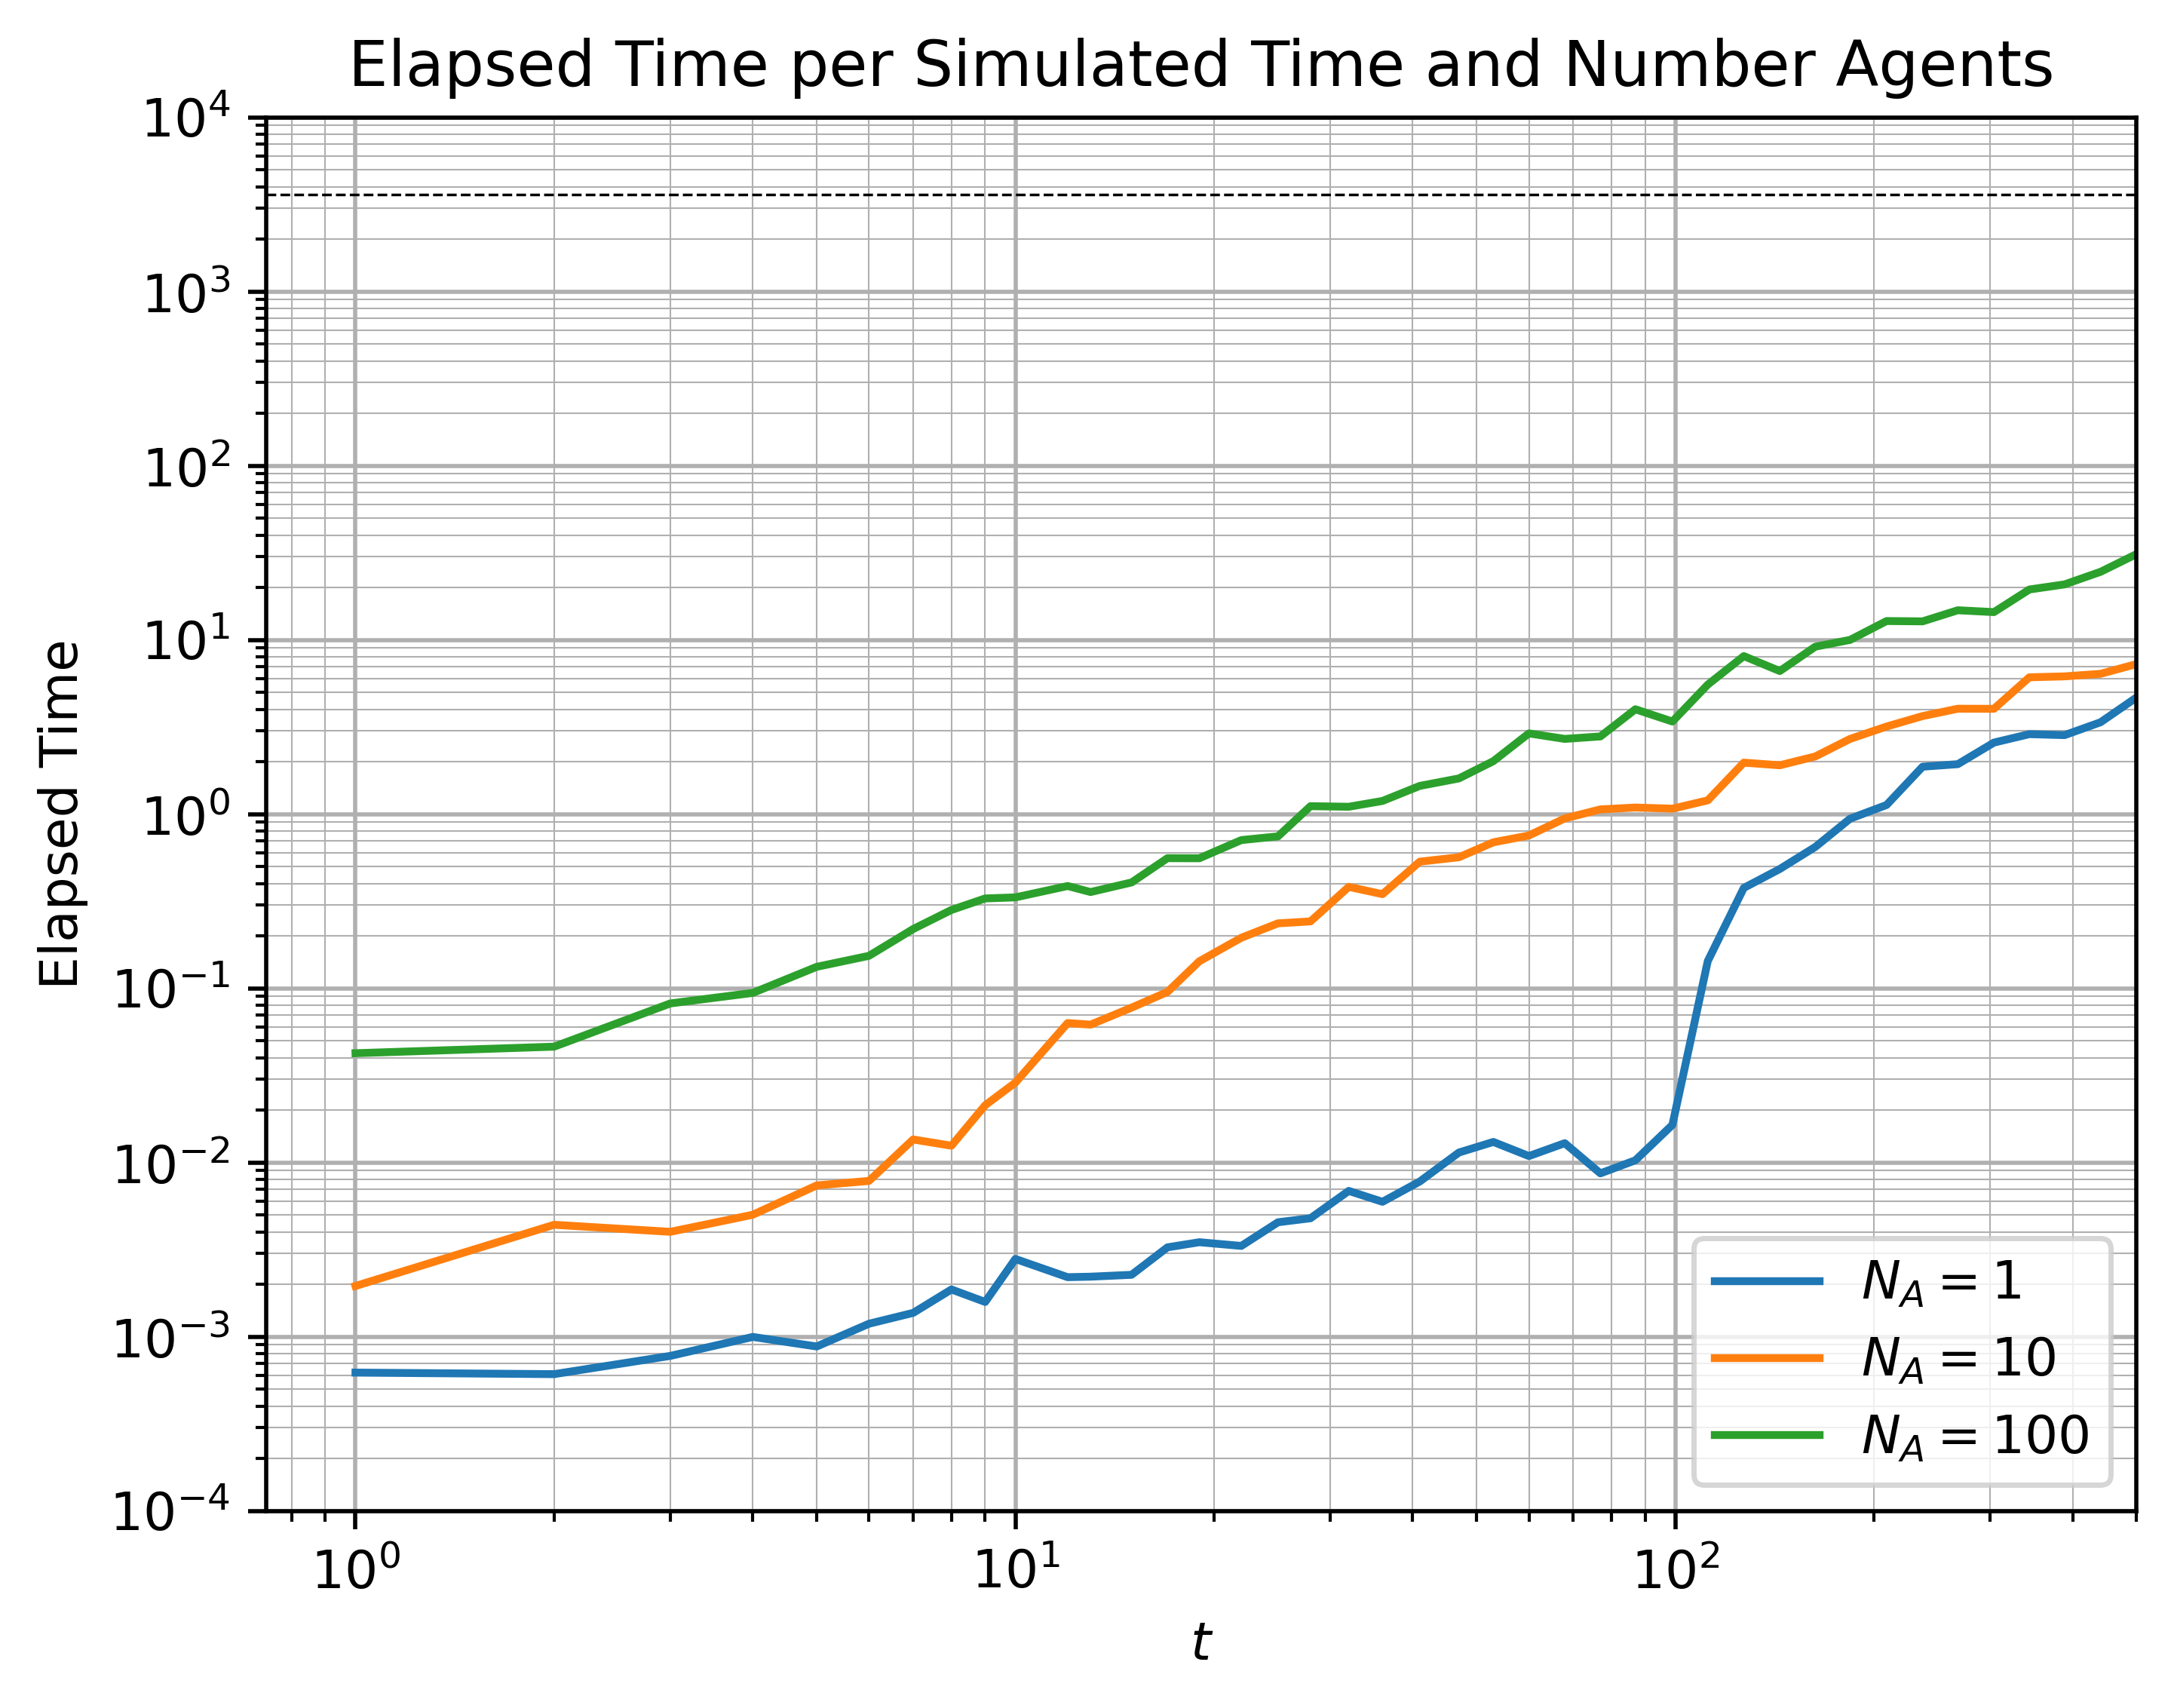

In [47]:
plt.rcParams['figure.dpi'] = 500
[sns.lineplot(data=df, x=df.index, y=n, label=rf'$N_A={n}$') for n in agent_array]
plt.xlabel('$t$')
plt.ylabel('Elapsed Time')
plt.legend()
plt.title('Elapsed Time per Simulated Time and Number Agents')

plt.xscale('log')
plt.yscale('log')

plt.grid(which='major')
plt.grid(which='minor', lw=0.3)

m = 60.
h = 60*m

plt.axhline(h, ls='--', c='k', lw=0.5)


plt.xlim(0,500)
plt.ylim(1e-4, 1e4)

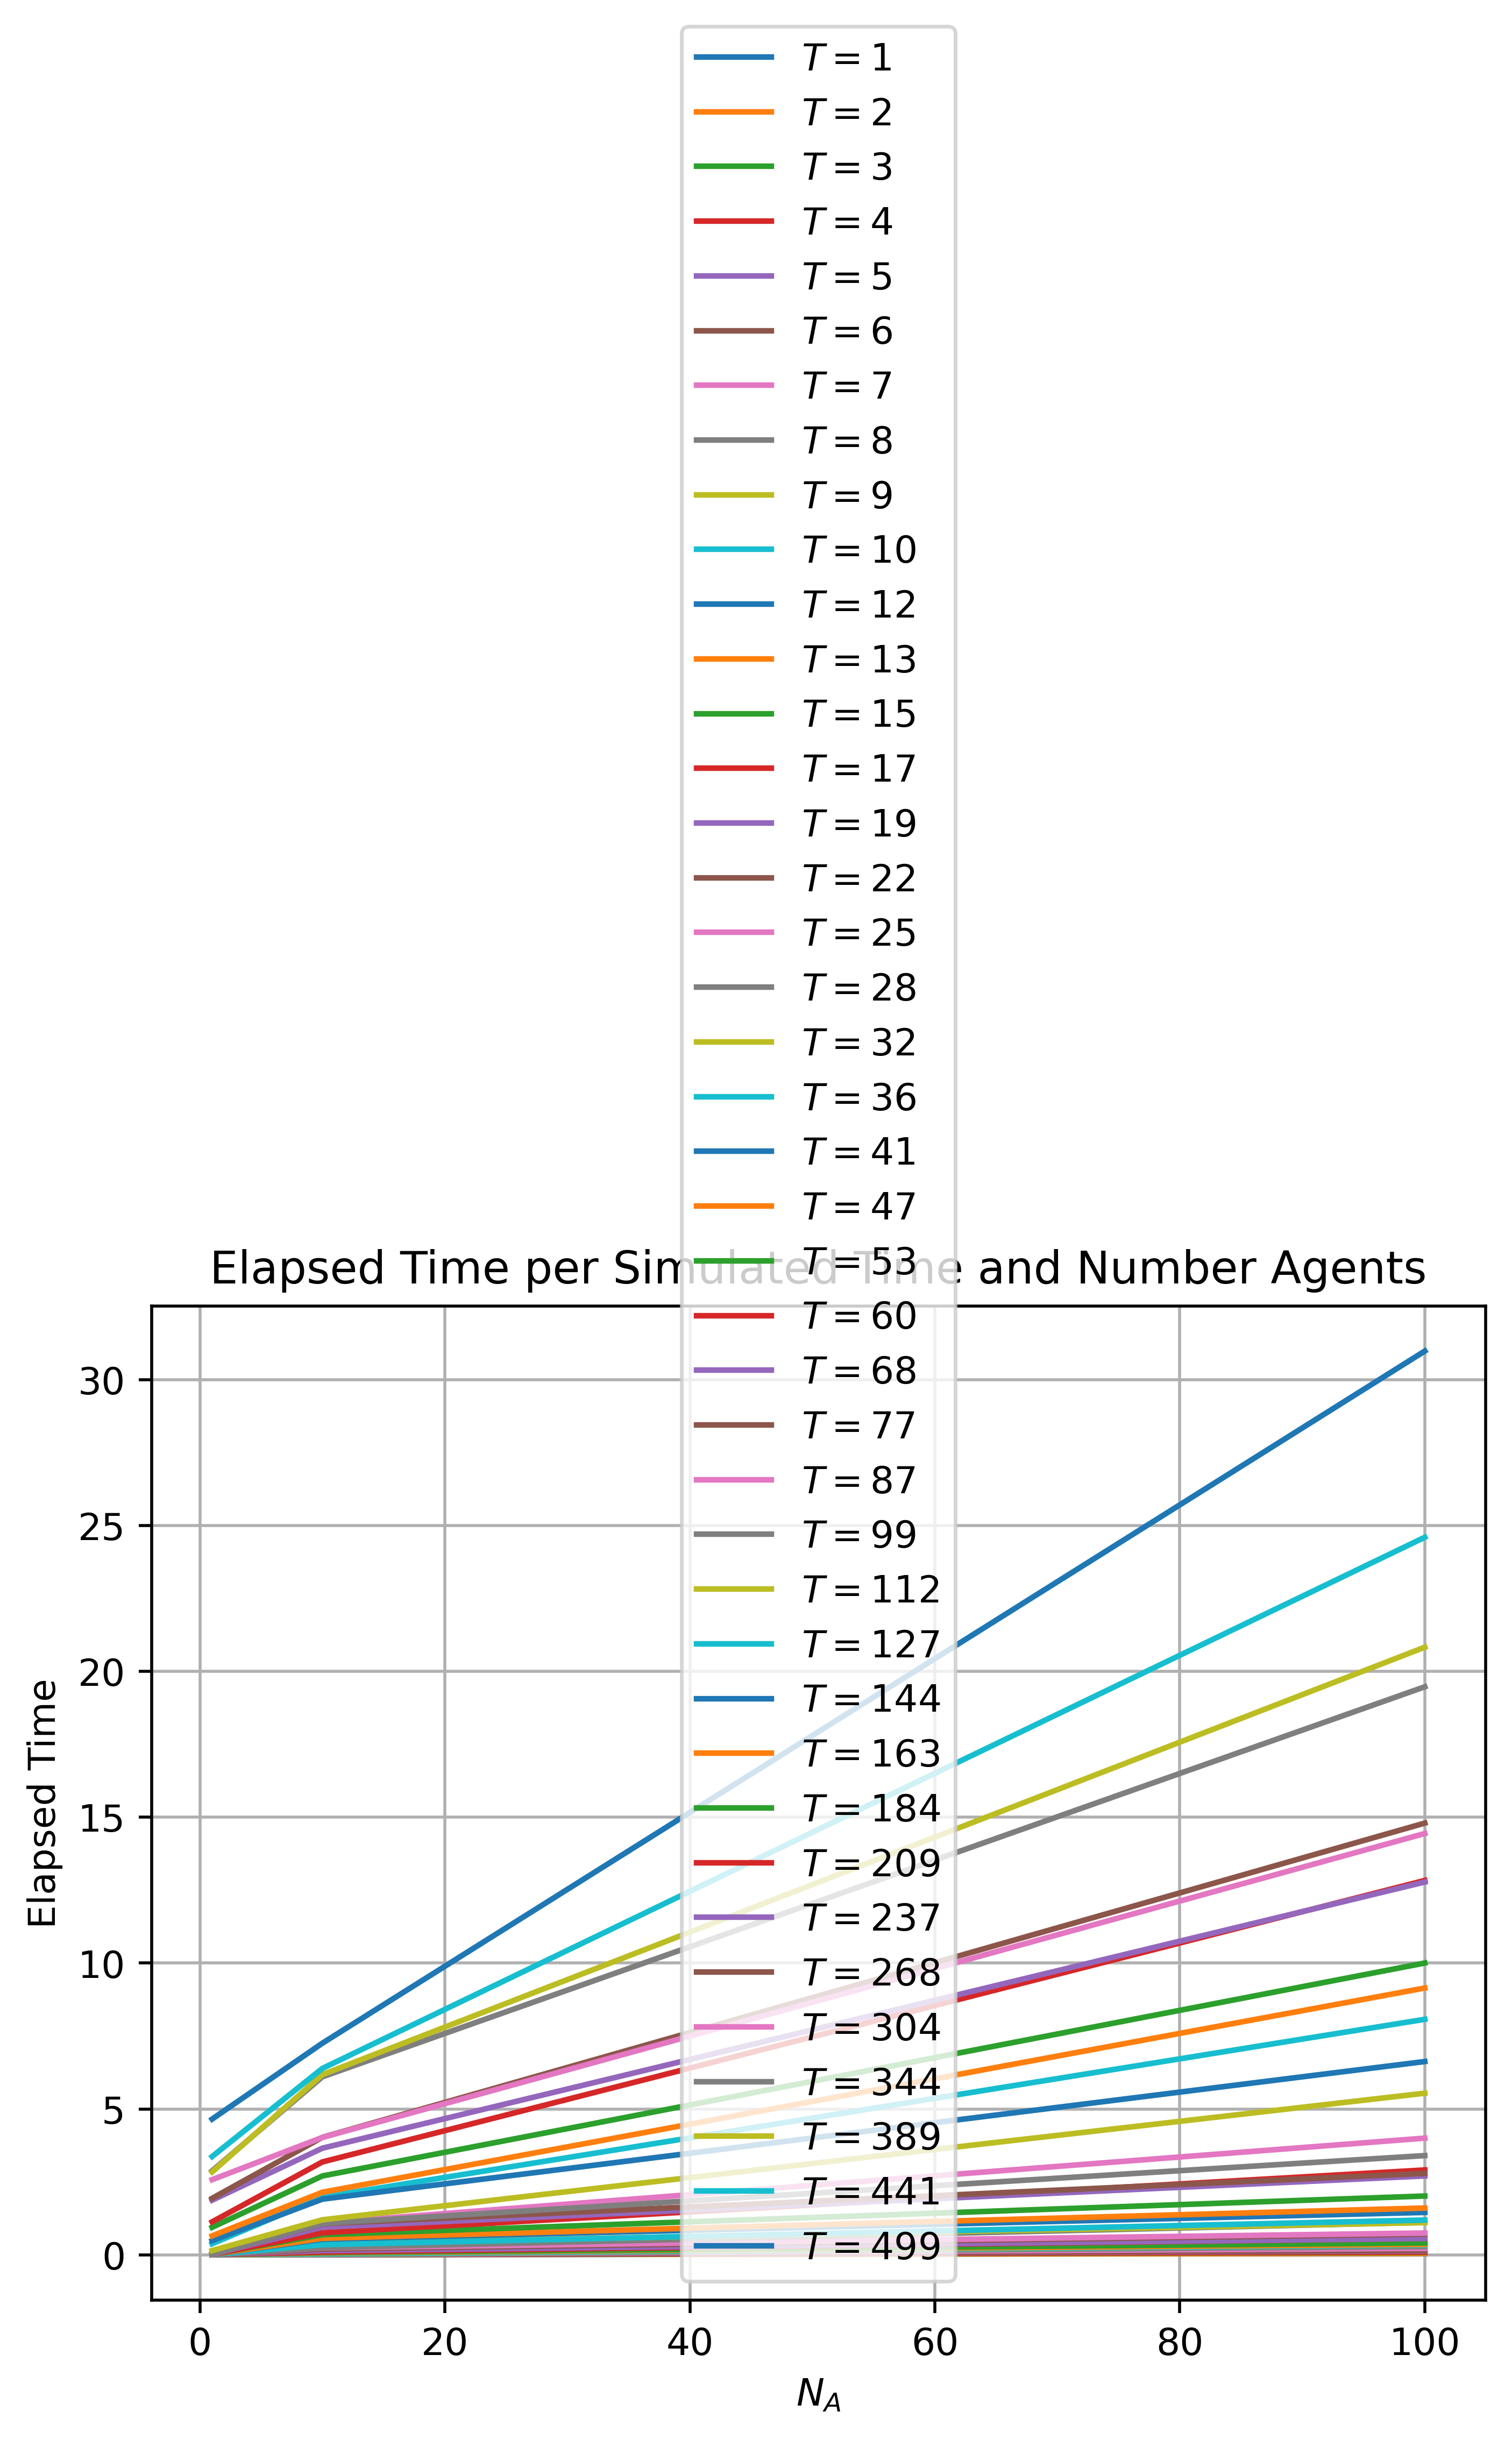

In [37]:
[sns.lineplot(data=df.T, x=df.T.index, y=T, label=rf'$T={T}$') for T in length_array]
plt.xlabel('$N_A$')
plt.ylabel('Elapsed Time')
plt.legend()
plt.title('Elapsed Time per Simulated Time and Number Agents')


plt.grid(which='major')
plt.grid(which='minor', lw=0.3)

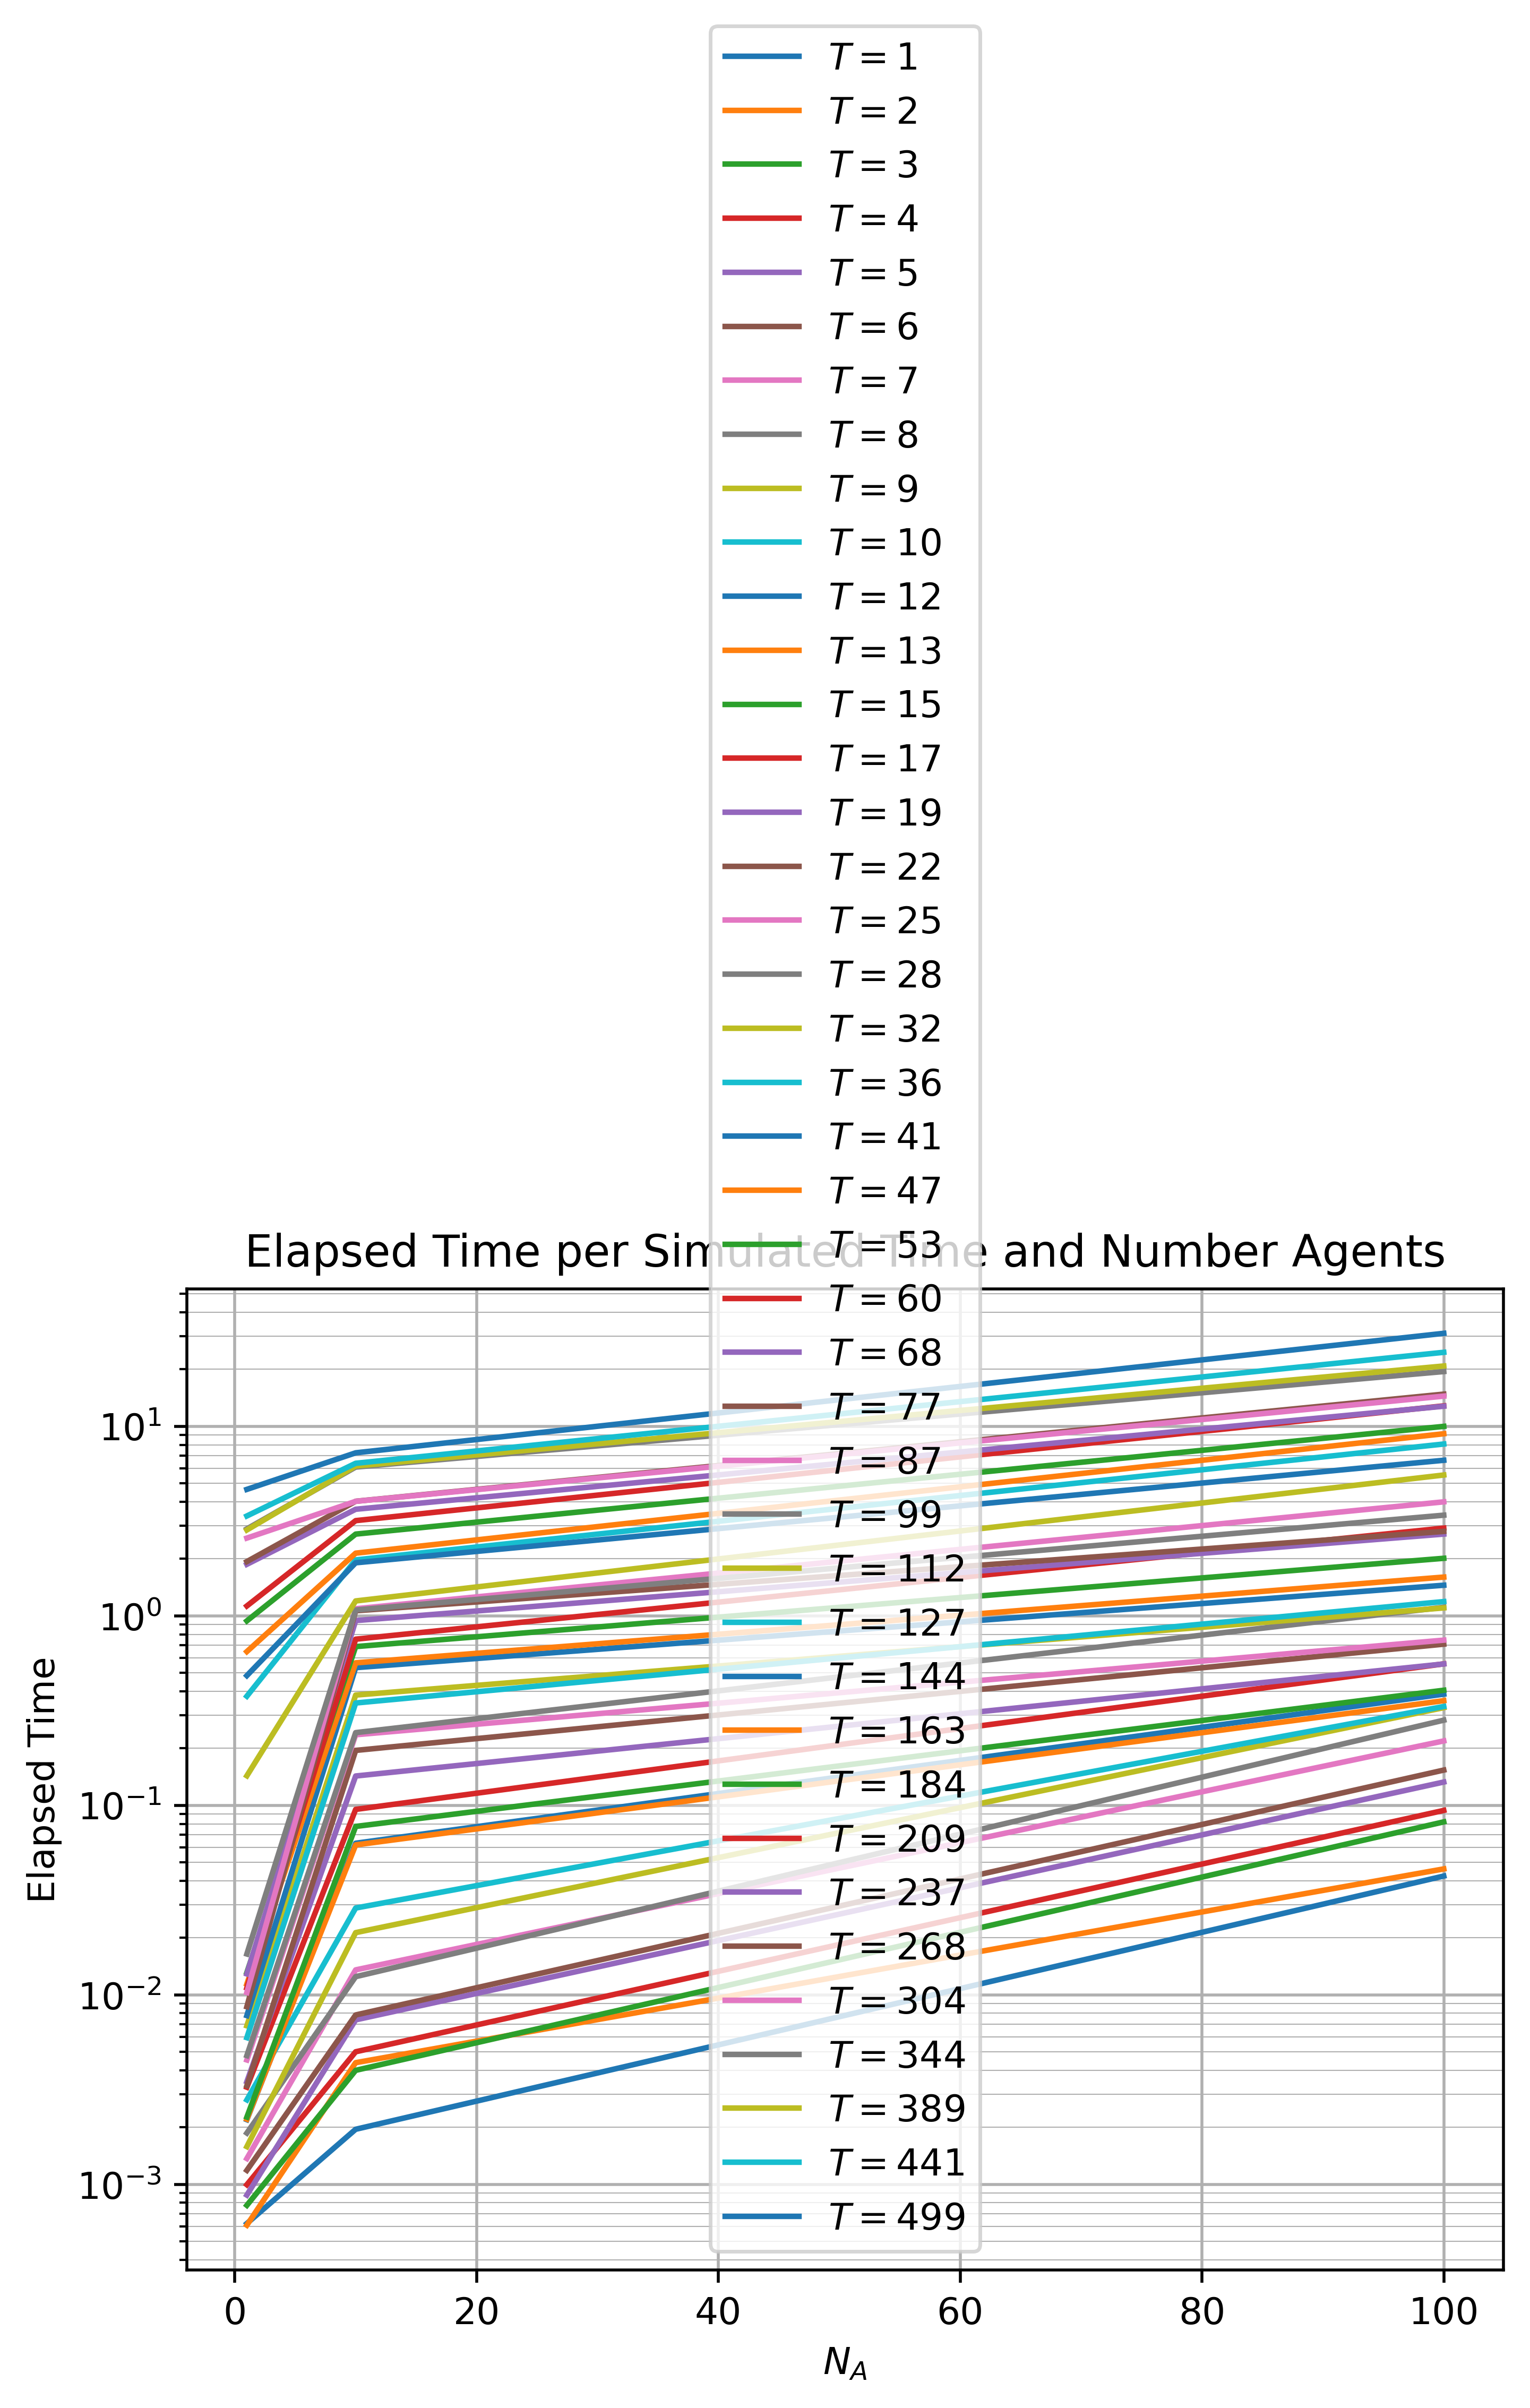

In [38]:
[sns.lineplot(data=df.T, x=df.T.index, y=T, label=rf'$T={T}$') for T in length_array]
plt.xlabel('$N_A$')
plt.ylabel('Elapsed Time')
plt.legend()
plt.title('Elapsed Time per Simulated Time and Number Agents')
plt.yscale('log')


plt.grid(which='major')
plt.grid(which='minor', lw=0.3)

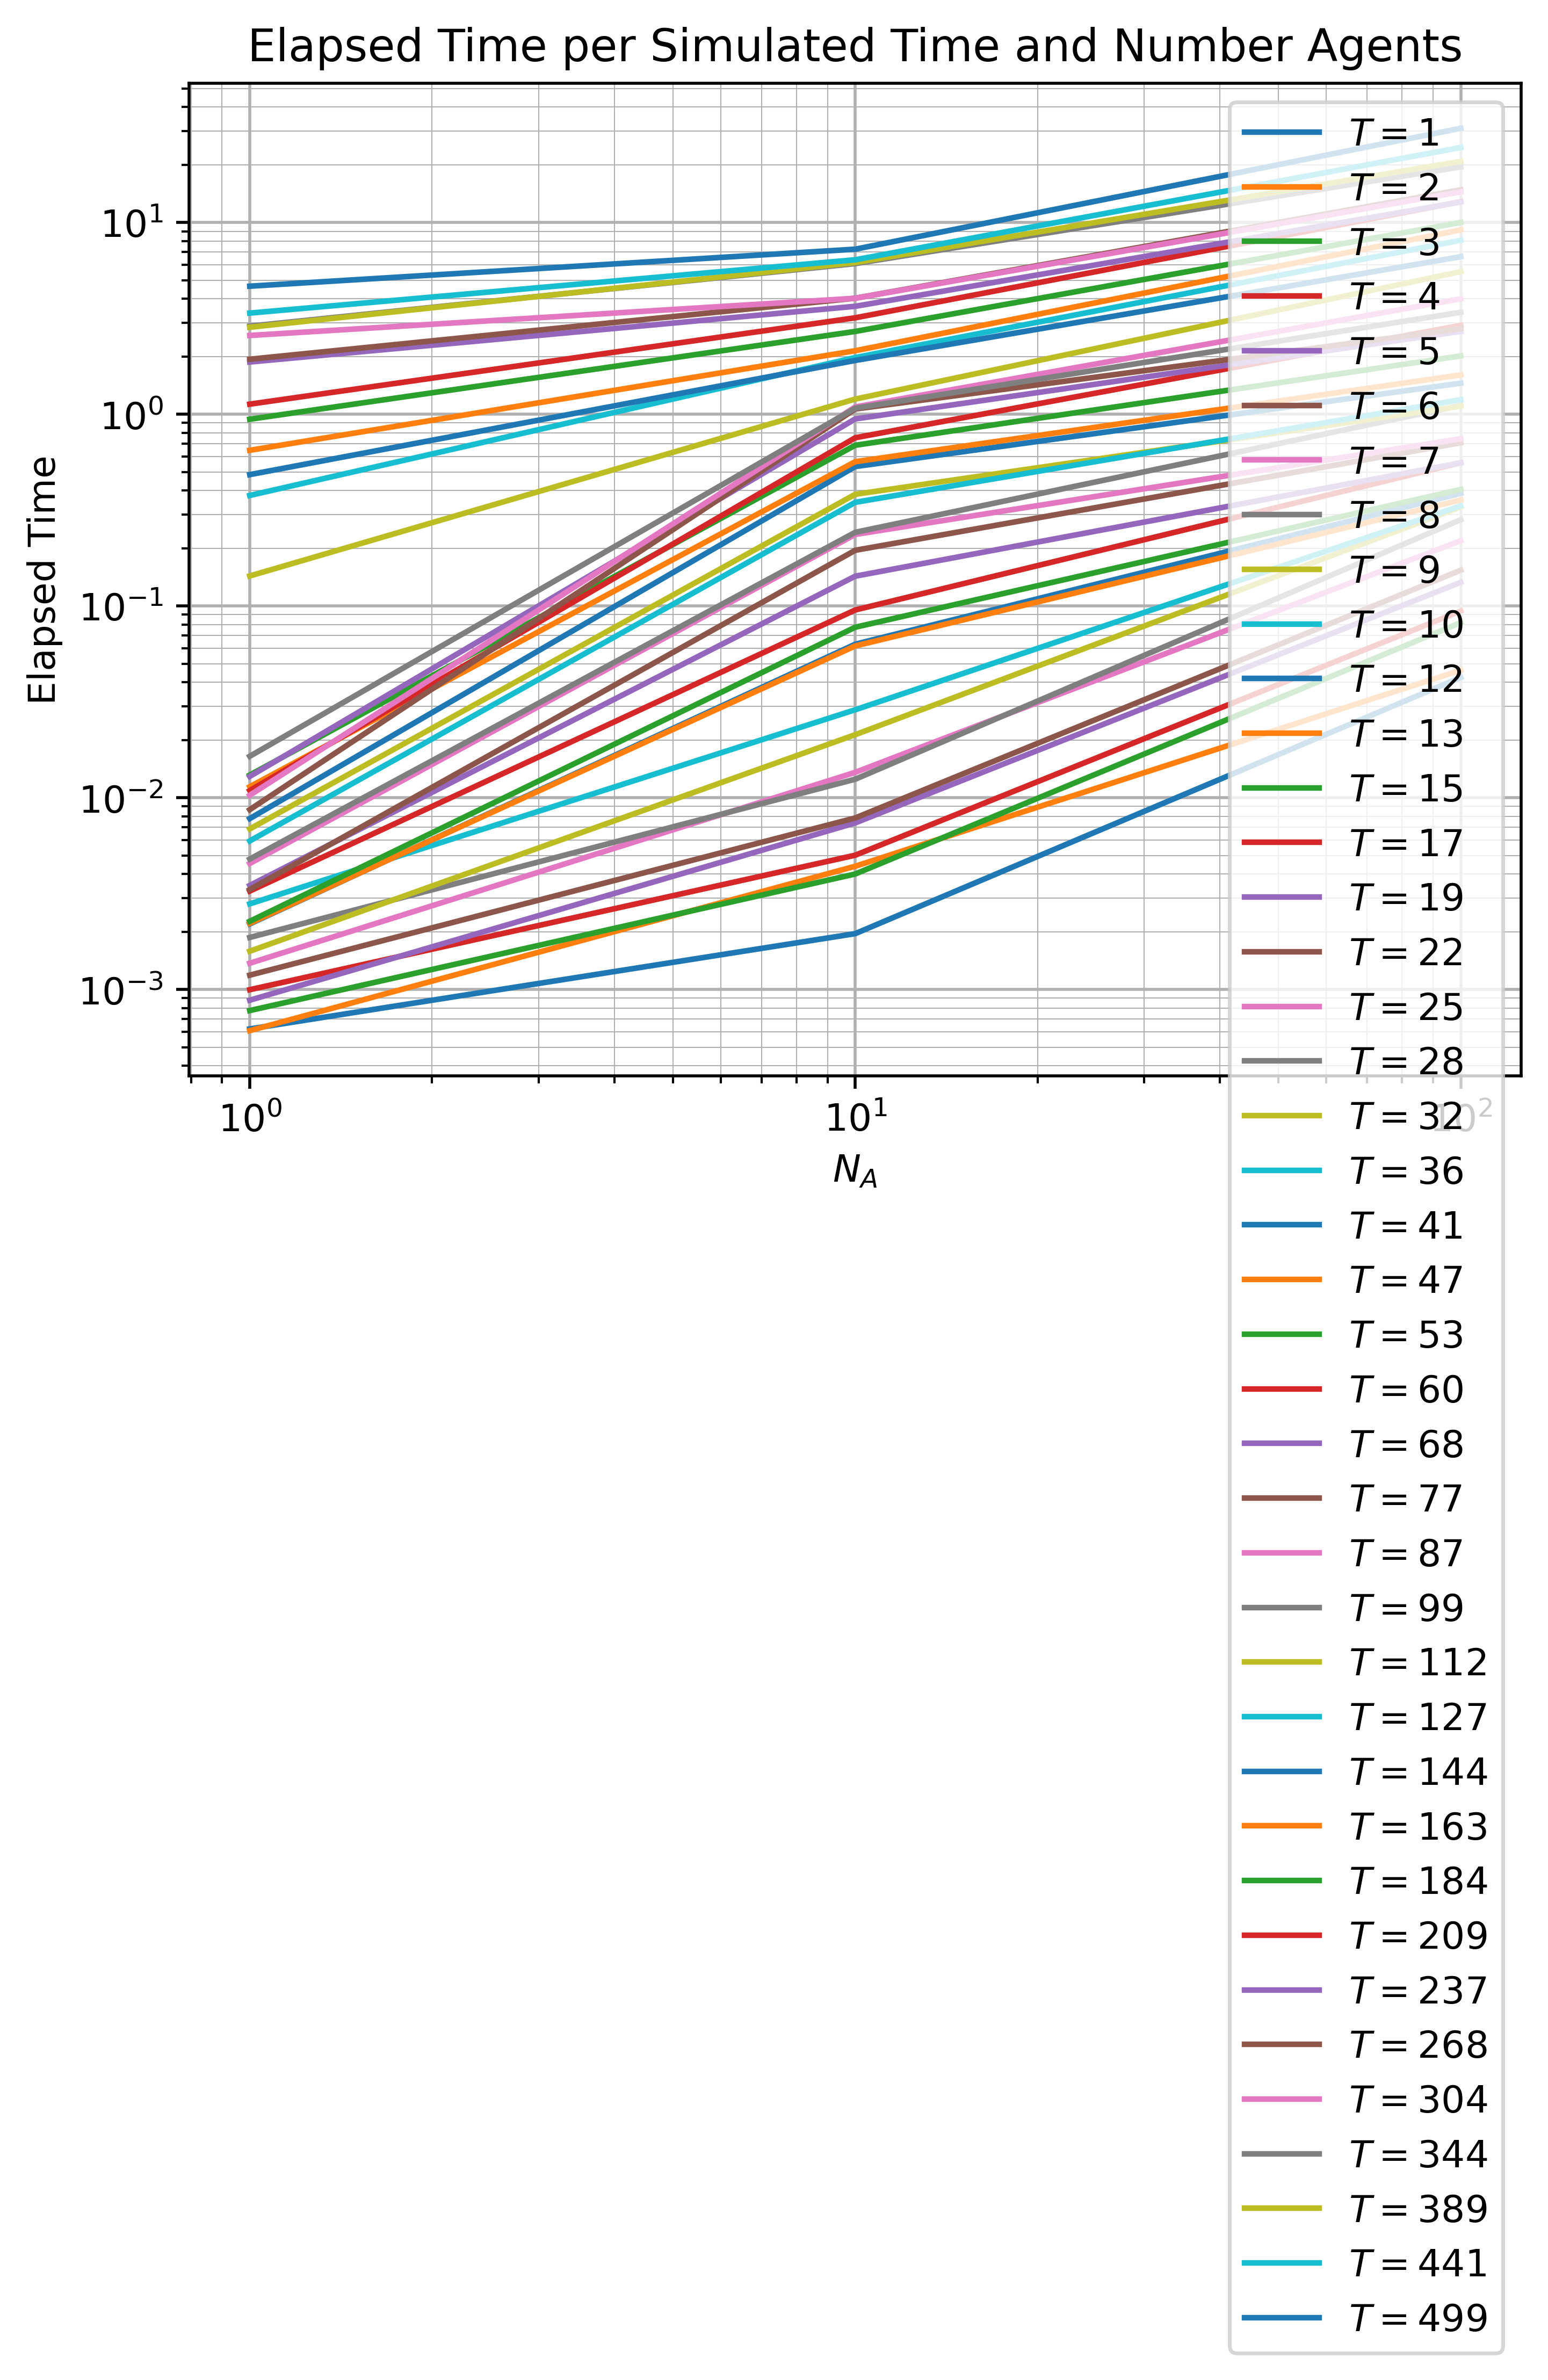

In [39]:
[sns.lineplot(data=df.T, x=df.T.index, y=T, label=rf'$T={T}$') for T in length_array]
plt.xlabel('$N_A$')
plt.ylabel('Elapsed Time')
plt.legend()
plt.title('Elapsed Time per Simulated Time and Number Agents')


plt.xscale('log')
plt.yscale('log')


plt.grid(which='major')
plt.grid(which='minor', lw=0.3)

Columns are # Agents

Index/Rows are Simulation Time

In [19]:
df

1          10          100
1    0.000862   0.001384    0.011871
2    0.000445   0.003242    0.021285
3    0.000675   0.003594    0.034836
4    0.000769   0.005701    0.039862
5    0.000859   0.007314    0.082398
6    0.001169   0.007313    0.085485
7    0.003011   0.012408    0.070758
8    0.001183   0.010881    0.102811
9    0.001419   0.009497    0.091860
10   0.002879   0.011153    0.114791
12   0.001940   0.017345    0.124096
13   0.001845   0.014065    0.145627
15   0.002077   0.016818    0.172744
17   0.002444   0.032958    0.335975
19   0.002658   0.020633    0.260188
22   0.002929   0.026316    0.267010
25   0.003297   0.036616    0.269967
28   0.003879   0.029336    0.301326
32   0.004841   0.057528    0.352690
36   0.008561   0.073989    0.428386
41   0.005341   0.042728    0.514169
47   0.006193   0.048210    0.521711
53   0.006986   0.065600    0.675118
60   0.013400   0.062763    0.757529
68   0.009407   0.072009    0.808481
77   0.009745   0.084470    0.988355
87   0.011972   0.094221    0.993472
99   0.012907   0.103165    1.200163
112  0.147838   1.453360   13.794788
127  0.332590   3.006999   30.112779
144  0.430778   4.288976   49.741044
163  0.663221   6.408893   67.257099
184  0.902581   8.654188   92.510568
209  1.122839  12.851229  109.150195
237  1.598934  14.087145  112.153472
268  1.714450  14.183469  123.560471
304  1.493118  14.651313  164.261514
344  1.960708  22.474568  255.165577
389  2.318890  25.119950  321.327655
441  4.793772  34.290456  372.167165
499  4.077082  49.481634  452.857656

In [20]:
total_time = df.sum().sum()/60./60.
total_time

0.6687324661388891

In [21]:
total_time/float(df.size) 

0.00543684931820235

Each column (# Agent) value (elapsed time) is x10 more than the previous.

Since each colulumn also increases by 10, this is linear growth

In [22]:
for n in [0, 1, 2]:
    x = df[10**(n+1)]/df[10**n]
    print(n+1, n, x.mean())

1 0 8.400541979705837
2 1 9.837349480451339


KeyError: 1000

In [ ]:
length_array

In [ ]:
for i,l in enumerate(length_array[:-1]):
    
    lnext = length_array[i+1]

    x = df.loc[lnext]/df.loc[l]
    y = lnext/float(l)
    
    print(lnext,l,x.median(),y)

In [ ]:
x,y

In [ ]:
assert False

In [ ]:
perf_array[:,n]

Initialize Agents, Instruments, and Markets

Run Simulation

In [ ]:
#agent = sim.agent_list[0]

#observation = sim.get_state(agent)
#agent.choose_action(observation)

In [ ]:
#observation

In [ ]:
#import torch as T

#state =  T.tensor(observation, dtype=T.float32).to(agent.Q_eval.device) 

#agent.Q_eval.forward(state) 

Plot

In [ ]:
splt = SimPlotting.SimPlotting(sim)
plt.rcParams['figure.dpi'] = 200

In [ ]:
splt.plotA(lw1=0.5)

In [ ]:
splt.plotQuantities(
    lw1=0.3, 
    lw2=0.05, 
    xmax=10, 
    tight_layout=True, 
    Qlog=True, 
    Dlog=True, 
    qmin=0, 
    qmax=6, 
    cmin=0, 
    cmax=6,
    Qmin = 1e-1,
    Qmax=1e3,
    Dmin=1e-1,
    Dmax=1e3,
)

In [ ]:
splt.action_probabilities()